## Author - Godhuli De

install libraries for Natural Learning Toolkit of Python

In [ ]:
pip install rake-nltk

In [48]:
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')

pd.set_option('display.max_columns', 50)
# direct way of using dataset
# df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')

df = pd.read_csv('IMDB_Top250Engmovies2_OMDB_Detailed.csv')
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,82.0,9.0,"1,802,351",tt0468569,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,8.9/10,96.0,8.9,"494,215",tt0050083,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [49]:
df = df[['Title','Genre','Director','Actors','Plot']]
df.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...


In [50]:
# discarding the commas between the actors' full names and getting only the first three names
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
df['Genre'] = df['Genre'].map(lambda x: x.lower().split(','))

df['Director'] = df['Director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word
# and there is no mix up between people sharing a first name
for index, row in df.iterrows():
    row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
    row['Director'] = ''.join(row['Director']).lower()

In [51]:
nltk.download('punkt')
# initializing the new column
df['Key_words'] = ""

for index, row in df.iterrows():
    plot = row['Plot']

    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()

    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
df.drop(columns = ['Plot'], inplace = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
df.set_index('Title', inplace = True)
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col != 'Director':
            words = words + ' '.join(row[col])+ ' '

        else:
            words = words + ' '.join(row[col]) + ' '

    print(words)
    df.at[index, 'bag_of_words'] = words.strip()
    # row['bag_of_words'] = words


df.drop(columns = [col for col in df.columns if col!= 'bag_of_words'], inplace = True)

crime  drama Frank Darabont Tim Robbins  Morgan Freeman  Bob Gunton   
crime  drama Francis Ford Coppola Marlon Brando  Al Pacino  James Caan   
crime  drama Francis Ford Coppola Al Pacino  Robert Duvall  Diane Keaton   
action  crime  drama Christopher Nolan Christian Bale  Heath Ledger  Aaron Eckhart   
crime  drama Sidney Lumet Martin Balsam  John Fiedler  Lee J. Cobb   
biography  drama  history Steven Spielberg Liam Neeson  Ben Kingsley  Ralph Fiennes   
adventure  drama  fantasy Peter Jackson Noel Appleby  Ali Astin  Sean Astin   
crime  drama Quentin Tarantino Tim Roth  Amanda Plummer  Laura Lovelace   
drama David Fincher Edward Norton  Brad Pitt  Meat Loaf   
adventure  drama  fantasy Peter Jackson Alan Howard  Noel Appleby  Sean Astin   
comedy  drama  romance Robert Zemeckis Tom Hanks  Rebecca Williams  Sally Field   
action  adventure  fantasy Irvin Kershner Mark Hamill  Harrison Ford  Carrie Fisher   
action  adventure  sci-fi Christopher Nolan Leonardo DiCaprio  Joseph Go

In [53]:
df.head()

,bag_of_words
Title,
The Shawshank Redemption,crime drama Frank Darabont Tim Robbins Morga...
The Godfather,crime drama Francis Ford Coppola Marlon Brand...
The Godfather: Part II,crime drama Francis Ford Coppola Al Pacino R...
The Dark Knight,action crime drama Christopher Nolan Christi...
12 Angry Men,crime drama Sidney Lumet Martin Balsam John ...


In [54]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
Name: Title, dtype: object

In [55]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.19069252, 0.19069252, ..., 0.09534626, 0.09534626,
        0.09534626],
       [0.19069252, 1.        , 0.63636364, ..., 0.09090909, 0.09090909,
        0.09090909],
       [0.19069252, 0.63636364, 1.        , ..., 0.09090909, 0.09090909,
        0.09090909],
       ...,
       [0.09534626, 0.09090909, 0.09090909, ..., 1.        , 0.09090909,
        0.09090909],
       [0.09534626, 0.09090909, 0.09090909, ..., 0.09090909, 1.        ,
        0.09090909],
       [0.09534626, 0.09090909, 0.09090909, ..., 0.09090909, 0.09090909,
        1.        ]])

In [56]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title):

    recommended_movies = []

    # gettin the index of the movie that matches the title
    try:
        idx = indices[indices == title].index[0]
    except:
        return print("This movie in not registred in our database")
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    #print(score_series)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df.index)[i])

    return recommended_movies, score_series[1:11]

In [59]:
un, du = recommendations('The Godfather')
d = {'Reccomendations': un, 'Score': du}
df2 = pd.DataFrame(data=d)
df2.head()

,Reccomendations,Score
2,The Godfather: Part II,0.636364
41,Apocalypse Now,0.545455
83,Scarface,0.363636
100,On the Waterfront,0.363636
96,Heat,0.348155


In [60]:
un, du = recommendations('The Dark Knight')
d = {'Reccomendations': un, 'Score': du}
df2 = pd.DataFrame(data=d)
df2.head()

,Reccomendations,Score
89,Batman Begins,0.476731
51,The Dark Knight Rises,0.476731
40,The Prestige,0.435194
178,Catch Me If You Can,0.272727
96,Heat,0.261116


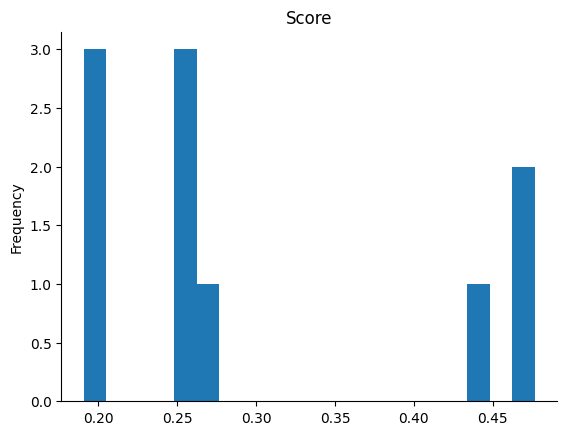

In [67]:
# @title Score

from matplotlib import pyplot as plt
df2['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

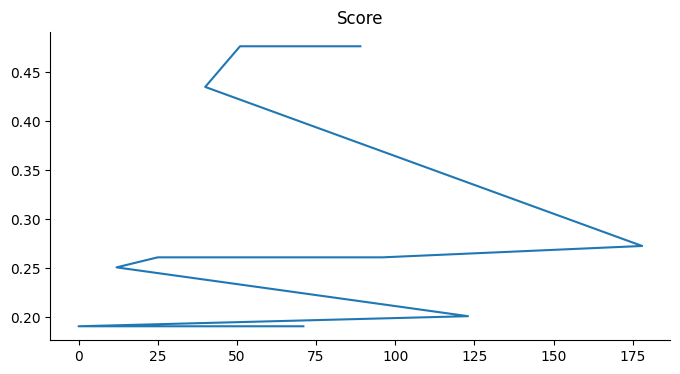

In [66]:
# @title Score

from matplotlib import pyplot as plt
df2['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
un, du = recommendations('The Dark Knight')
d = {'Reccomendations': un, 'Score': du}
df2 = pd.DataFrame(data=d)
df2.head()

,Reccomendations,Score
89,Batman Begins,0.476731
51,The Dark Knight Rises,0.476731
40,The Prestige,0.435194
178,Catch Me If You Can,0.272727
96,Heat,0.261116


# movies to input
Heat, Fargo, Warrior
- -ve testing
Barbie